### Importing needed modules

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import os
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, MaxPooling2D, Dense, Flatten, Activation

### Loading the training and validation dataset using Keras

In [62]:
batch_size = 32
img_height = 120
img_width = 120

train_ds = tf.keras.utils.image_dataset_from_directory(
  r"C:\Users\franc\VSCode\FundAprendAuto\FAA-Project-1\images",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle = True,
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  r"C:\Users\franc\VSCode\FundAprendAuto\FAA-Project-1\images",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle = True,
  )

Found 6820 files belonging to 150 classes.
Using 5456 files for training.
Found 6820 files belonging to 150 classes.
Using 1364 files for validation.


In [63]:
class_names = train_ds.class_names
print("Existing classes")
print(class_names)

Existing classes
['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk'

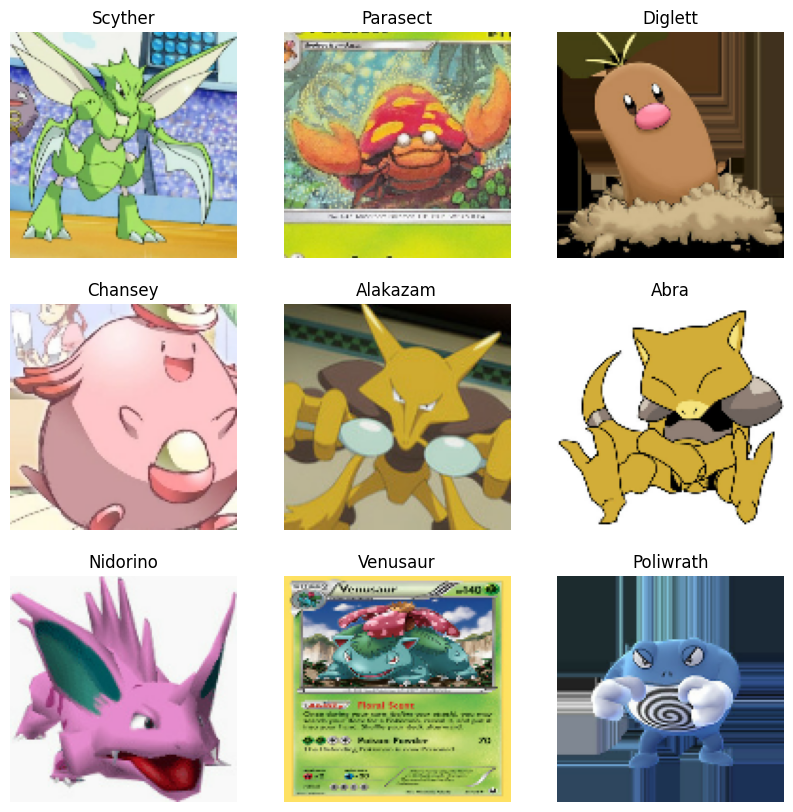

In [64]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [65]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 120, 120, 3)
(32,)


In [66]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [67]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.007471332 1.0


In [68]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  BatchNormalization(),

  MaxPooling2D(3,strides=(3,3)),

  Conv2D(32, 3, padding='same', activation='relu'),
  BatchNormalization(),

  MaxPooling2D(2,strides=(2,2)),

  Conv2D(64, 3, padding='same', activation='relu'),
  BatchNormalization(),

  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes)
])

In [69]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 120, 120, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 120, 120, 16)      448       
                                                                 
 batch_normalization_10 (Bat  (None, 120, 120, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 40, 40, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 40, 40, 32)        4640      
                                                                 
 batch_normalization_11 (Bat  (None, 40, 40, 32)      

In [71]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=32,
    epochs=epochs,
)

Epoch 1/10
171/171 [==============================] - 34s 194ms/step - loss: 5.0273 - accuracy: 0.0187 - val_loss: 5.4396 - val_accuracy: 0.0095
Epoch 2/10
171/171 [==============================] - 28s 166ms/step - loss: 4.3712 - accuracy: 0.0929 - val_loss: 5.4861 - val_accuracy: 0.0579
Epoch 3/10
171/171 [==============================] - 29s 172ms/step - loss: 3.2226 - accuracy: 0.2601 - val_loss: 4.0991 - val_accuracy: 0.1298
Epoch 4/10
171/171 [==============================] - 29s 168ms/step - loss: 1.8115 - accuracy: 0.5411 - val_loss: 3.7520 - val_accuracy: 0.2485
Epoch 5/10
171/171 [==============================] - 28s 165ms/step - loss: 0.7580 - accuracy: 0.7934 - val_loss: 3.3257 - val_accuracy: 0.3079
Epoch 6/10
171/171 [==============================] - 28s 165ms/step - loss: 0.2831 - accuracy: 0.9256 - val_loss: 4.5096 - val_accuracy: 0.2742
Epoch 7/10
171/171 [==============================] - 29s 168ms/step - loss: 0.0958 - accuracy: 0.9791 - val_loss: 3.9495 - val_ac

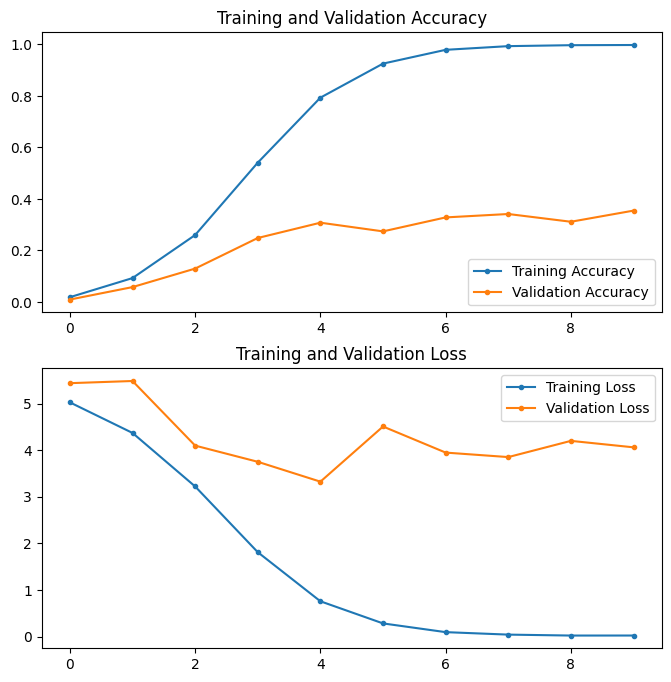

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker= '.')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker= '.')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker= '.')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker= '.')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [73]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

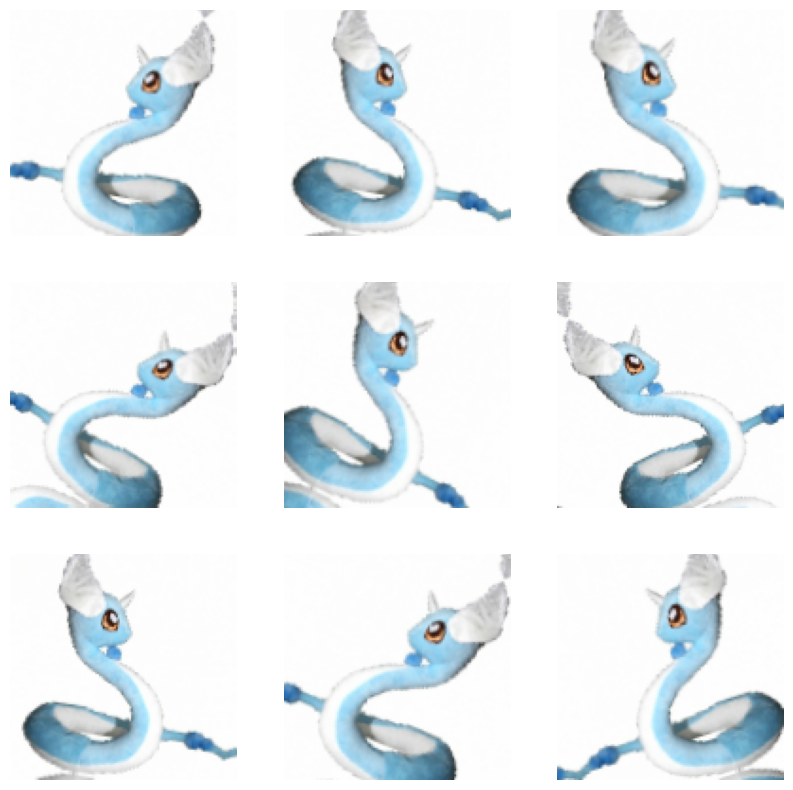

In [74]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images, training = True)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [75]:
model1 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [76]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [77]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 120, 120, 3)       0         
                                                                 
 rescaling_11 (Rescaling)    (None, 120, 120, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 120, 120, 16)      448       
                                                                 
 batch_normalization_13 (Bat  (None, 120, 120, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 60, 60, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 60, 60, 32)      

In [78]:
epochs = 15
history1 = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
171/171 [==============================] - 49s 252ms/step - loss: 4.6658 - accuracy: 0.0403 - val_loss: 4.5168 - val_accuracy: 0.0887
Epoch 2/15
171/171 [==============================] - 39s 226ms/step - loss: 3.4390 - accuracy: 0.1857 - val_loss: 3.5203 - val_accuracy: 0.1950
Epoch 3/15
171/171 [==============================] - 38s 225ms/step - loss: 2.7921 - accuracy: 0.2861 - val_loss: 2.9151 - val_accuracy: 0.2669
Epoch 4/15
171/171 [==============================] - 39s 226ms/step - loss: 2.3772 - accuracy: 0.3730 - val_loss: 2.5396 - val_accuracy: 0.3666
Epoch 5/15
171/171 [==============================] - 39s 227ms/step - loss: 2.0211 - accuracy: 0.4531 - val_loss: 2.3298 - val_accuracy: 0.4113
Epoch 6/15
171/171 [==============================] - 39s 227ms/step - loss: 1.7338 - accuracy: 0.5323 - val_loss: 2.4234 - val_accuracy: 0.3820
Epoch 7/15
171/171 [==============================] - 32s 189ms/step - loss: 1.5701 - accuracy: 0.5678 - val_loss: 2.3739 - val_ac

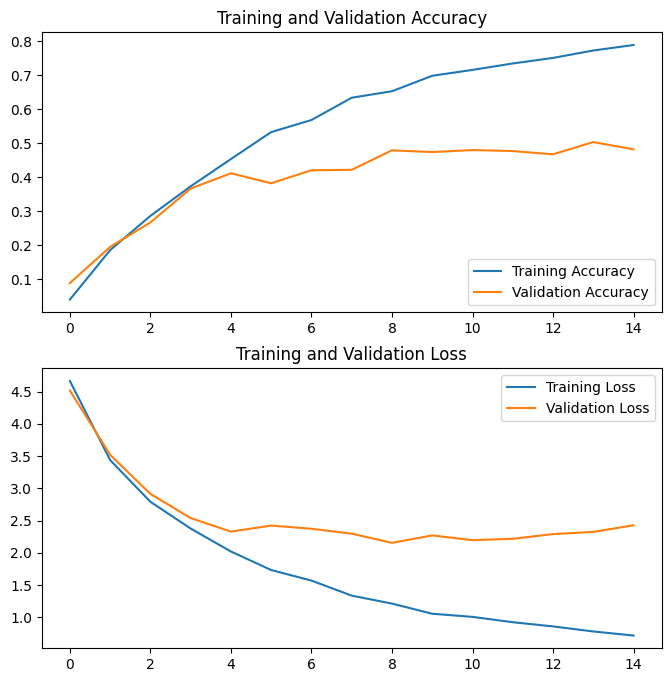

In [79]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [80]:
model2_l2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),

  Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  BatchNormalization(),
  MaxPooling2D(),

  Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  MaxPooling2D(),

  Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  MaxPooling2D(),

  Dropout(0.2),
  Flatten(),
  Dense(128, activation='relu', kernel_regularizer='l2'),
  Dense(num_classes)
])

In [81]:
model2_l2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [82]:
model2_l2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 120, 120, 3)       0         
                                                                 
 rescaling_12 (Rescaling)    (None, 120, 120, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 120, 120, 16)      448       
                                                                 
 batch_normalization_14 (Bat  (None, 120, 120, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 60, 60, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 60, 60, 32)      

In [83]:
epochs = 15
history2 = model2_l2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
171/171 [==============================] - 35s 186ms/step - loss: 5.7553 - accuracy: 0.0405 - val_loss: 5.0445 - val_accuracy: 0.0667
Epoch 2/15
171/171 [==============================] - 32s 185ms/step - loss: 4.0171 - accuracy: 0.1578 - val_loss: 4.1918 - val_accuracy: 0.2023
Epoch 3/15
171/171 [==============================] - 33s 190ms/step - loss: 3.4579 - accuracy: 0.2549 - val_loss: 3.6842 - val_accuracy: 0.2155
Epoch 4/15
171/171 [==============================] - 31s 183ms/step - loss: 3.1269 - accuracy: 0.3132 - val_loss: 3.3574 - val_accuracy: 0.2859
Epoch 5/15
171/171 [==============================] - 31s 183ms/step - loss: 2.9770 - accuracy: 0.3501 - val_loss: 3.3285 - val_accuracy: 0.2874
Epoch 6/15
171/171 [==============================] - 31s 183ms/step - loss: 2.8387 - accuracy: 0.3765 - val_loss: 3.2633 - val_accuracy: 0.3138
Epoch 7/15
171/171 [==============================] - 31s 184ms/step - loss: 2.7502 - accuracy: 0.3992 - val_loss: 3.0160 - val_ac

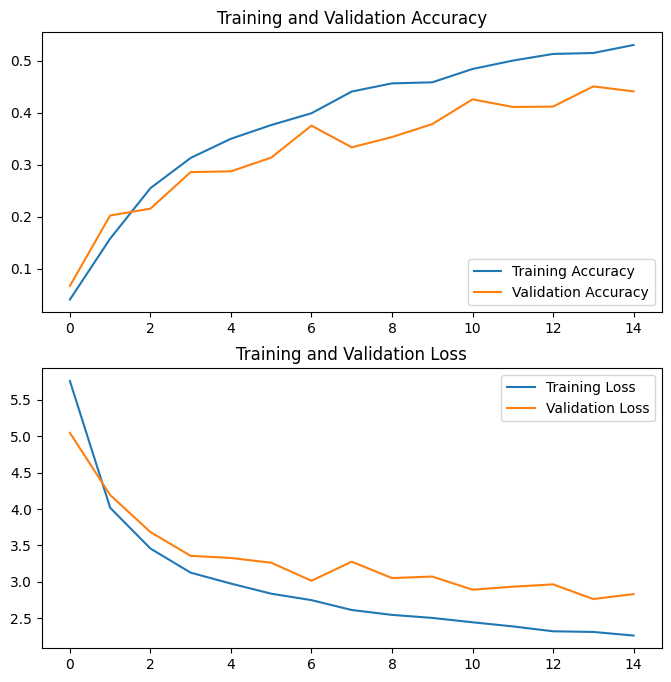

In [84]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### K-Fold Cross Validation

In [18]:
from sklearn.model_selection import KFold

history_tmp = []

train_images = np.concatenate(list(train_ds.map(lambda x, y:x)))
train_labels = np.concatenate(list(train_ds.map(lambda x, y:y)))

val_images = np.concatenate(list(val_ds.map(lambda x, y:x)))
val_labels = np.concatenate(list(val_ds.map(lambda x, y:y)))

inputs = np.concatenate((train_images, val_images), axis=0)
targets = np.concatenate((train_labels, val_labels), axis=0)


# model that produced best results so far is used here
model3 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

kfold = KFold(n_splits=5, shuffle=True)

scores = []
history_arr = []

for train, test in kfold.split(inputs, targets):
  
  model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  history_tmp = model3.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=10, 
              validation_data = (inputs[test], targets[test]),
              verbose=1)
  scores_tmp = model3.evaluate(inputs[test], targets[test])
  scores.append(scores_tmp)
  history_arr.append(history_tmp)


Epoch 1/10
171/171 [==============================] - 51s 248ms/step - loss: 5.0249 - accuracy: 0.0082 - val_loss: 5.0115 - val_accuracy: 0.0029
Epoch 2/10
171/171 [==============================] - 37s 218ms/step - loss: 5.0088 - accuracy: 0.0084 - val_loss: 5.0113 - val_accuracy: 0.0044
Epoch 3/10
171/171 [==============================] - 39s 227ms/step - loss: 5.0067 - accuracy: 0.0081 - val_loss: 5.0098 - val_accuracy: 0.0088
Epoch 4/10
171/171 [==============================] - 38s 221ms/step - loss: 4.9983 - accuracy: 0.0115 - val_loss: 5.0190 - val_accuracy: 0.0051
Epoch 5/10
171/171 [==============================] - 39s 226ms/step - loss: 4.9849 - accuracy: 0.0134 - val_loss: 5.0128 - val_accuracy: 0.0095
Epoch 6/10
171/171 [==============================] - 38s 225ms/step - loss: 4.9621 - accuracy: 0.0136 - val_loss: 5.0355 - val_accuracy: 0.0103
Epoch 7/10
171/171 [==============================] - 37s 215ms/step - loss: 4.9344 - accuracy: 0.0167 - val_loss: 5.0511 - val_ac

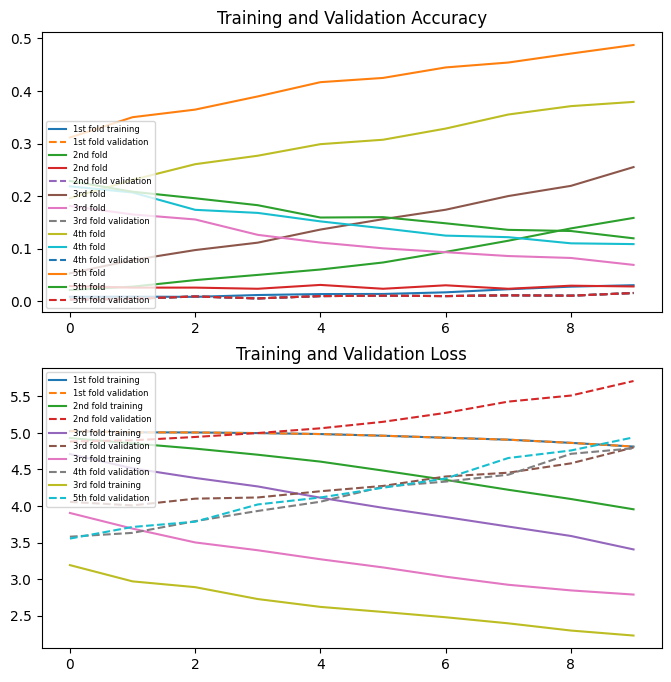

In [38]:
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, history_arr[0].history['accuracy'],  label='1st fold training')
plt.plot(epochs_range, history_arr[0].history['val_accuracy'], '--', label='1st fold validation')
plt.plot(epochs_range, history_arr[1].history['accuracy'], history_arr[1].history['val_accuracy'], label='2nd fold')
plt.plot(epochs_range, history_arr[0].history['val_accuracy'], '--', label='2nd fold validation')
plt.plot(epochs_range, history_arr[2].history['accuracy'], history_arr[2].history['val_accuracy'], label='3rd fold')
plt.plot(epochs_range, history_arr[0].history['val_accuracy'], '--', label='3rd fold validation')
plt.plot(epochs_range, history_arr[3].history['accuracy'], history_arr[3].history['val_accuracy'], label='4th fold')
plt.plot(epochs_range, history_arr[0].history['val_accuracy'], '--', label='4th fold validation')
plt.plot(epochs_range, history_arr[4].history['accuracy'], history_arr[4].history['val_accuracy'], label='5th fold')
plt.plot(epochs_range, history_arr[0].history['val_accuracy'], '--', label='5th fold validation')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower left', prop = {'size':6})
plt.title('Training and Validation Accuracy')



plt.subplot(2, 1, 2)
plt.plot(epochs_range, history_arr[0].history['loss'], label='1st fold training')
plt.plot(epochs_range, history_arr[0].history['loss'], '--', label='1st fold validation')
plt.plot(epochs_range, history_arr[1].history['loss'], label='2nd fold training')
plt.plot(epochs_range, history_arr[1].history['val_loss'], '--', label='2nd fold validation')
plt.plot(epochs_range, history_arr[2].history['loss'], label='3rd fold training')
plt.plot(epochs_range, history_arr[2].history['val_loss'],'--', label='3rd fold validation')
plt.plot(epochs_range, history_arr[3].history['loss'], label='3rd fold training')
plt.plot(epochs_range, history_arr[3].history['val_loss'],'--', label='4th fold validation')
plt.plot(epochs_range, history_arr[4].history['loss'], label='3rd fold training')
plt.plot(epochs_range, history_arr[4].history['val_loss'],'--', label='5th fold validation')
# plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='upper left', prop = {'size':6})
plt.title('Training and Validation Loss')
plt.show()

In [99]:
from sklearn.metrics import confusion_matrix

#Predict
y_prediction = model.predict(val_ds)
y_pred = np.argmax(y_prediction, axis=1)

y_test = np.concatenate([y for x, y in val_ds], axis=0)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_pred , normalize='pred')


43/43 [==============================] - 1s 30ms/step


<AxesSubplot: >

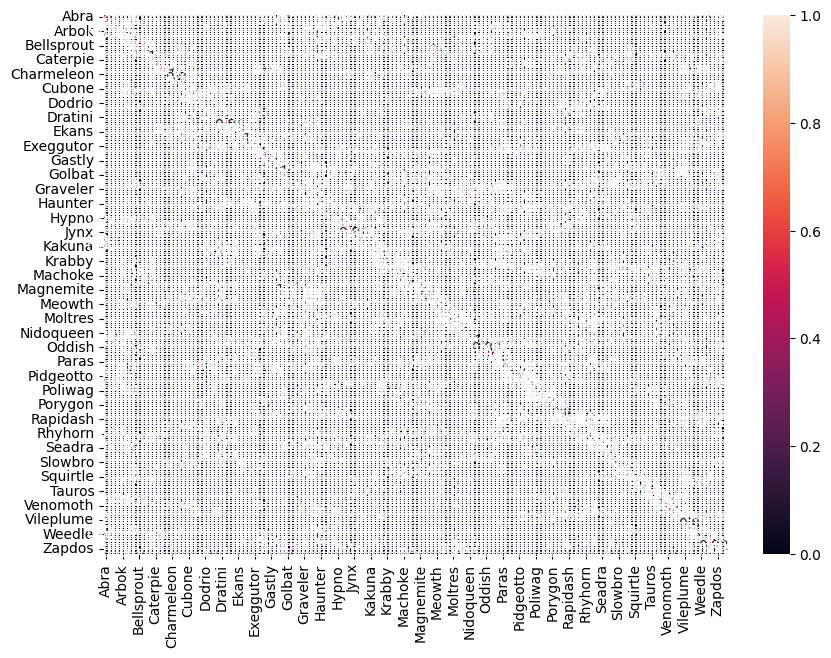

In [101]:
import seaborn as sn

df_cm = pd.DataFrame(result, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

43/43 [==============================] - 2s 36ms/step


<AxesSubplot: >

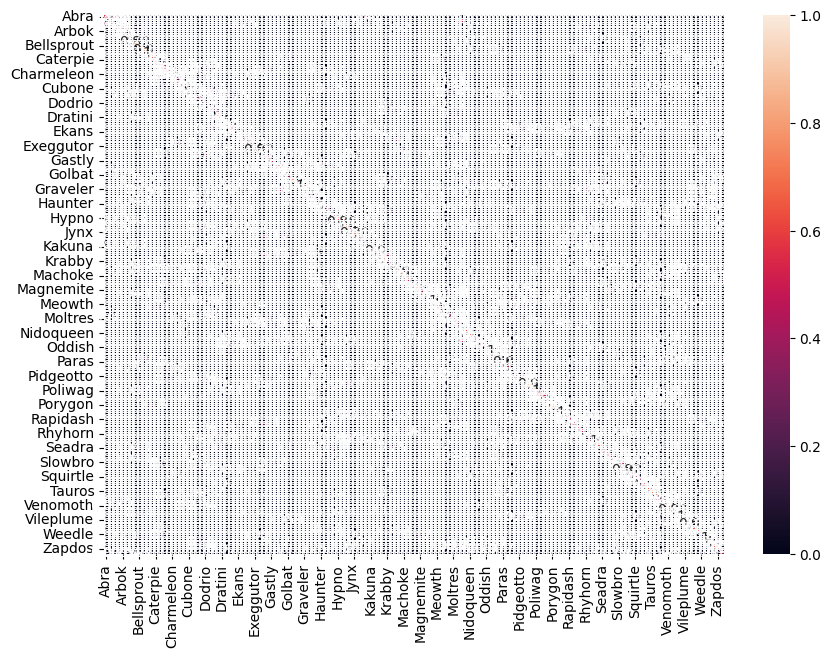

In [102]:
#Predict
y_prediction = model1.predict(val_ds)
y_pred = np.argmax(y_prediction, axis=1)

y_test = np.concatenate([y for x, y in val_ds], axis=0)

#Create confusion matrix and normalizes it over predicted (columns)
result1 = confusion_matrix(y_test, y_pred , normalize='pred')

df_cm = pd.DataFrame(result1, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

43/43 [==============================] - 2s 34ms/step


<AxesSubplot: >

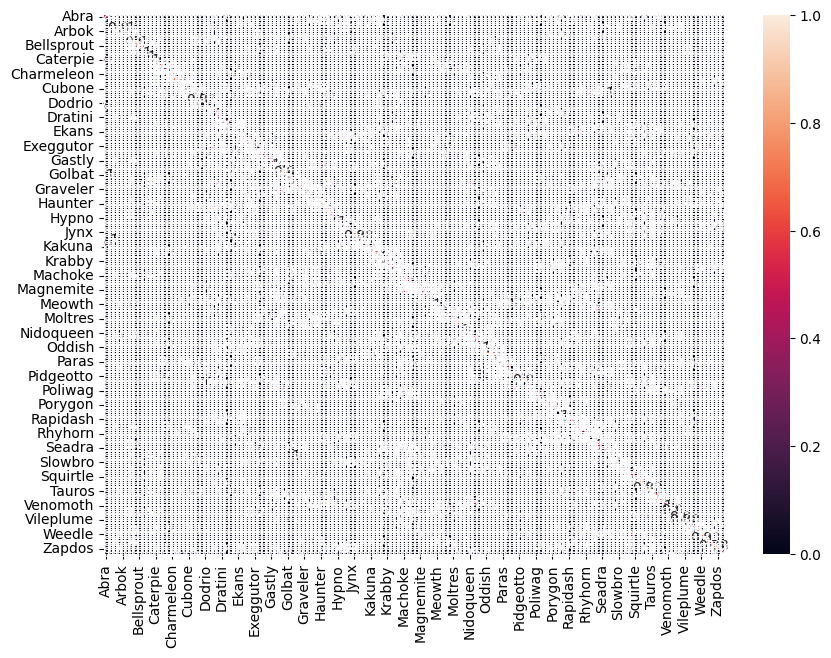

In [103]:
#Predict
y_prediction = model2_l2.predict(val_ds)
y_pred = np.argmax(y_prediction, axis=1)

y_test = np.concatenate([y for x, y in val_ds], axis=0)

#Create confusion matrix and normalizes it over predicted (columns)
result2 = confusion_matrix(y_test, y_pred , normalize='pred')

df_cm = pd.DataFrame(result2, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

43/43 [==============================] - 2s 38ms/step


<AxesSubplot: >

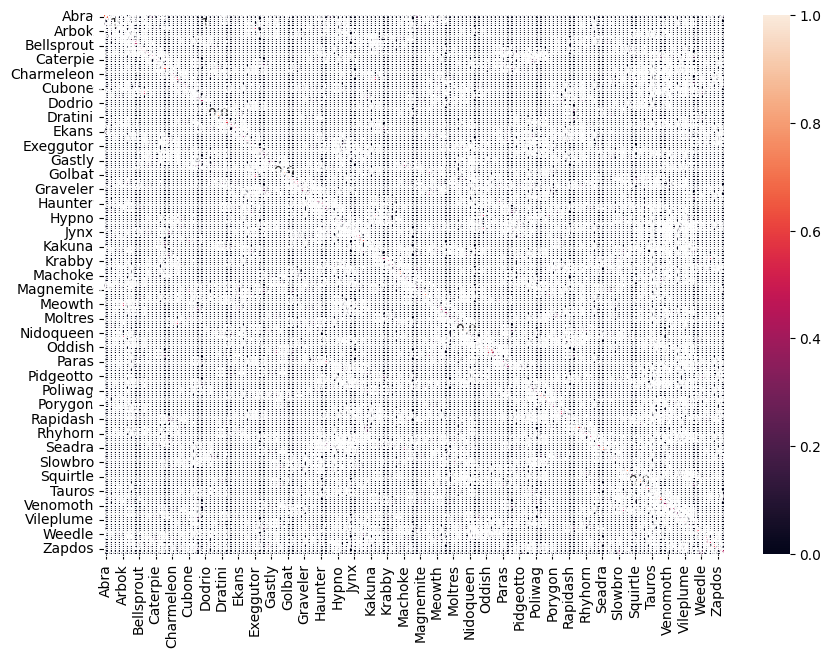

In [104]:
#Predict
y_prediction = model3.predict(val_ds)
y_pred = np.argmax(y_prediction, axis=1)

y_test = np.concatenate([y for x, y in val_ds], axis=0)

#Create confusion matrix and normalizes it over predicted (columns)
result3 = confusion_matrix(y_test, y_pred , normalize='pred')

df_cm = pd.DataFrame(result3, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)